<a href="https://colab.research.google.com/github/Sambhav1207/Deep-Learning-Projects/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Face Mask Detection using CNN

In [1]:
!pip install kaggle

In [2]:
#Configuring the Path of kaggle.json File
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

##Importing Face Mask Dataset

In [3]:
#API to Fetch the Dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 154M/163M [00:00<00:00, 173MB/s]
100% 163M/163M [00:01<00:00, 164MB/s]


In [4]:
#Extracting the Compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done.')

Done.


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


##Importing the Dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1025.jpg', 'with_mask_1017.jpg', 'with_mask_2471.jpg', 'with_mask_2517.jpg', 'with_mask_885.jpg']
['with_mask_3020.jpg', 'with_mask_891.jpg', 'with_mask_26.jpg', 'with_mask_1036.jpg', 'with_mask_220.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2999.jpg', 'without_mask_1673.jpg', 'without_mask_245.jpg', 'without_mask_1665.jpg', 'without_mask_2672.jpg']
['without_mask_1682.jpg', 'without_mask_3701.jpg', 'without_mask_3197.jpg', 'without_mask_909.jpg', 'without_mask_1897.jpg']


In [9]:
print('Number of With Mask Images:', len(with_mask_files))
print('Number of Without Mask Images:', len(without_mask_files))

Number of With Mask Images: 3725
Number of Without Mask Images: 3828


##Creating Labels for the 2 Class of Images

With Mask --> 1

Without Mask --> 0

In [10]:
#Create the Labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


##Displaying the Images

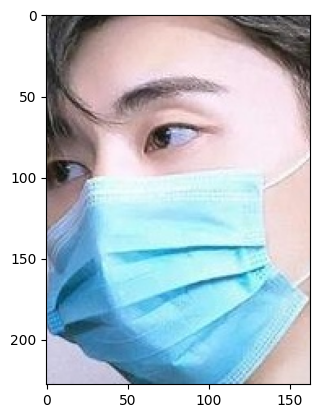

In [14]:
#Displaying a With Mask Image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

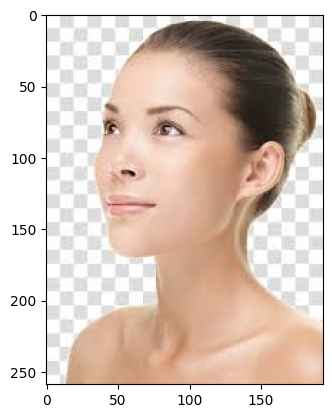

In [15]:
#Displaying a Without Mask Image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

##Image Processing

1. Resizing the Images.
2. Converting them to NumPy Arrays.

In [16]:
#Convert Images to NumPy Arrays
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [25, 29, 28],
        [26, 30, 28],
        [27, 30, 28]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [33, 33, 32],
        [33, 34, 31],
        [32, 36, 31]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [40, 39, 37],
        [39, 40, 36],
        [39, 42, 37]]], dtype=uint8)
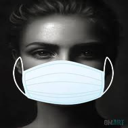

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
#Converting Image List and Label List to NumPy Arrays
X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


##Train Test Split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
#Scaling the Data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[186, 194, 197],
        [161, 169, 172],
        [132, 140, 143],
        ...,
        [137, 119, 104],
        [134, 117, 102],
        [143, 125, 112]],

       [[184, 192, 195],
        [176, 184, 187],
        [153, 161, 164],
        ...,
        [137, 119, 104],
        [134, 116, 102],
        [143, 125, 112]],

       [[184, 192, 195],
        [182, 190, 193],
        [174, 182, 185],
        ...,
        [137, 119, 104],
        [134, 116, 102],
        [142, 124, 111]],

       ...,

       [[147, 157, 149],
        [152, 161, 156],
        [158, 167, 163],
        ...,
        [128, 123, 117],
        [127, 122, 116],
        [135, 130, 124]],

       [[148, 158, 150],
        [152, 161, 155],
        [156, 165, 161],
        ...,
        [131, 126, 120],
        [129, 124, 118],
        [134, 129, 123]],

       [[150, 160, 152],
        [152, 161, 156],
        [154, 163, 159],
        ...,
        [134, 129, 123],
        [131, 126, 120],
        [134, 129, 123]]], dtype=uint8)
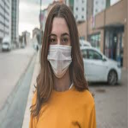

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.72941176, 0.76078431, 0.77254902],
        [0.63137255, 0.6627451 , 0.6745098 ],
        [0.51764706, 0.54901961, 0.56078431],
        ...,
        [0.5372549 , 0.46666667, 0.40784314],
        [0.5254902 , 0.45882353, 0.4       ],
        [0.56078431, 0.49019608, 0.43921569]],

       [[0.72156863, 0.75294118, 0.76470588],
        [0.69019608, 0.72156863, 0.73333333],
        [0.6       , 0.63137255, 0.64313725],
        ...,
        [0.5372549 , 0.46666667, 0.40784314],
        [0.5254902 , 0.45490196, 0.4       ],
        [0.56078431, 0.49019608, 0.43921569]],

       [[0.72156863, 0.75294118, 0.76470588],
        [0.71372549, 0.74509804, 0.75686275],
        [0.68235294, 0.71372549, 0.7254902 ],
        ...,
        [0.5372549 , 0.46666667, 0.40784314],
        [0.5254902 , 0.45490196, 0.4       ],
        [0.55686275, 0.48627451, 0.43529412]],

       ...,

       [[0.57647059, 0.61568627, 0.58431373],
        [0.59607843, 0.63137255, 0.61176471],
        [0.61960784, 0

##Building a Convolutional Neural Network (CNN)

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
#Compile the NN
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
#Training the NN
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 132s 769ms/step - loss: 0.5066 - accuracy: 0.7626 - val_loss: 0.2656 - val_accuracy: 0.9041
Epoch 2/5
170/170 [==============================] - 126s 744ms/step - loss: 0.3070 - accuracy: 0.8777 - val_loss: 0.2353 - val_accuracy: 0.9091
Epoch 3/5
170/170 [==============================] - 130s 764ms/step - loss: 0.2709 - accuracy: 0.8893 - val_loss: 0.2486 - val_accuracy: 0.8909
Epoch 4/5
170/170 [==============================] - 136s 801ms/step - loss: 0.2288 - accuracy: 0.9082 - val_loss: 0.2637 - val_accuracy: 0.9058
Epoch 5/5
170/170 [==============================] - 129s 757ms/step - loss: 0.1948 - accuracy: 0.9198 - val_loss: 0.1925 - val_accuracy: 0.9339


##Model Evaluation

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ', accuracy)

48/48 [==============================] - 11s 229ms/step - loss: 0.1953 - accuracy: 0.9279
Test Accuracy =  0.9278623461723328


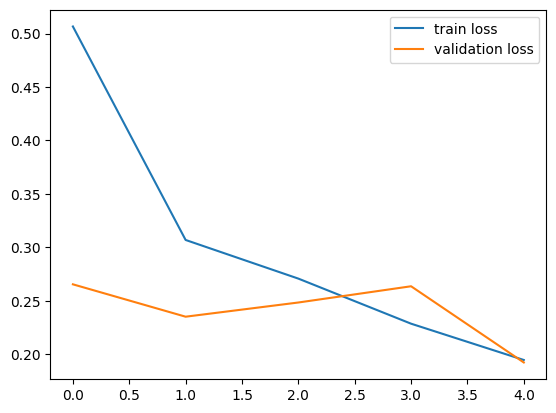

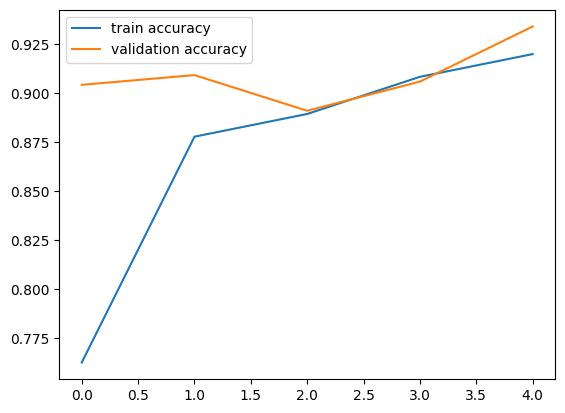

In [39]:
h = history
#Plot the Loss Value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
#Plot the Accuracy Value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

##Predictive System

Path of the image to be predicted: /content/withoutmasktest.jpg


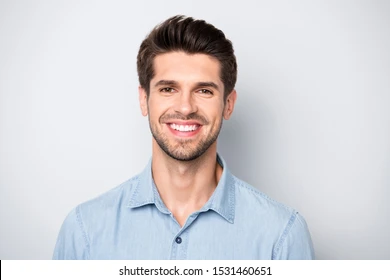

1/1 [==============================] - 0s 31ms/step
[[0.49177825 0.48064396]]
0
The person in the image is not wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')